In [1]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [2]:
import pandas as pd

def read_csv_to_dataframe(file_path):
    """
    Reads a comma-separated CSV file and converts it into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    df = pd.read_csv(file_path)  # assumes the file is comma-separated
    return df

In [3]:
# Ensure the function is defined (run the cell with the function definition if needed)
terminos_df = read_csv_to_dataframe(r"C:\git_RobertVZ\CursoPython\bases_datos\Terminos_lagoon_TA_DIC_2023_RawData.csv")
print(terminos_df.head())  # show first 5 rows

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465  ...     6.24    28.06   

   sp_cond_microsiemens_cm  turbidity_fnu  temp_c  latitude  longitude  \
0                   6547.7          

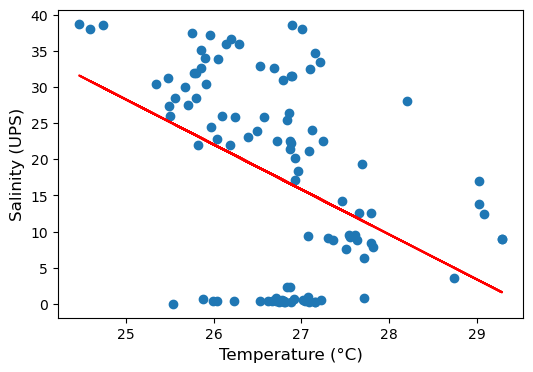

Slope: -6.237079764689512


In [5]:
import matplotlib.pyplot as plt
from scipy import stats

x = terminos_df['temp_c']
y = terminos_df['sal_psu']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('Temperature (°C)', fontsize = 12, )
plt.ylabel('Salinity (UPS)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'TEMP_SAL.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)


In [6]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -6.237079764689512
intercept: 184.22846870564854


In [7]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = terminos_df['temp_c']
y = terminos_df['sal_psu']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                sal_psu   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     22.44
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           6.88e-06
Time:                        14:45:54   Log-Likelihood:                -416.05
No. Observations:                 106   AIC:                             836.1
Df Residuals:                     104   BIC:                             841.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        184.2285     35.249      5.226      0.0

In [8]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.177
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 184.2285, p = 0.0000 → ✔️ Significant (p < 0.05)
- temp_c: Coef = -6.2371, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (temp_c): -6.2371, p = 0.0000 → ✔️ Significant

Standard Error of the model: 12.3741


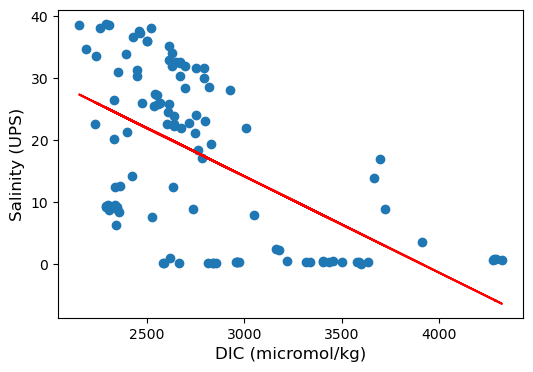

Slope: -0.015537057058518267


In [9]:
import matplotlib.pyplot as plt
from scipy import stats

x = terminos_df['dic_micromol_kg']
y = terminos_df['sal_psu']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('DIC (micromol/kg)', fontsize = 12, )
plt.ylabel('Salinity (UPS)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'TEMP_SAL.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)

In [10]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -0.015537057058518267
intercept: 60.80437362978961


In [11]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = terminos_df['dic_micromol_kg']
y = terminos_df['sal_psu']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                sal_psu   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     50.56
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.51e-10
Time:                        14:49:16   Log-Likelihood:                -405.41
No. Observations:                 106   AIC:                             814.8
Df Residuals:                     104   BIC:                             820.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.8044      6.210     

In [12]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.327
❌ Weak model fit: Explains little variance. Review your model.

Coefficients:
- const: Coef = 60.8044, p = 0.0000 → ✔️ Significant (p < 0.05)
- dic_micromol_kg: Coef = -0.0155, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (dic_micromol_kg): -0.0155, p = 0.0000 → ✔️ Significant

Standard Error of the model: 11.1923
